# ft_linear_regression

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from library.model import model, \
	cost_function, gradient_descent, coeff_determination
import pickle

## Load dataset

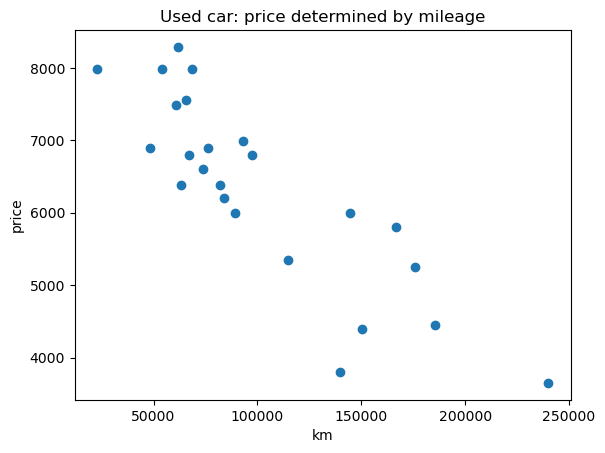

In [2]:
df = pd.read_csv('../data.csv')
df.shape
plt.scatter(df['km'], df['price'])
plt.xlabel('km')
plt.ylabel('price')
plt.title('Used car: price determined by mileage')
plt.show()

- <strong>feature</strong>: km
- <strong>target</strong>: price
- <strong>m</strong>: 24
- <strong>n</strong>: 1

## Apply formula to dataset

In [3]:
x = np.array(df['km'], dtype = float)
y = np.array(df['price'], dtype = float)
x_min = np.min(x)
x_range = np.max(x) - x_min
x = (x - x_min) / x_range

print(x.shape)
print(y.shape)
print(y)

(24,)
(24,)
[3650. 3800. 4400. 4450. 5250. 5350. 5800. 5990. 5999. 6200. 6390. 6390.
 6600. 6800. 6800. 6900. 6900. 6990. 7490. 7555. 7990. 7990. 7990. 8290.]


In [4]:
y = y.reshape(y.shape[0], 1)
X = x.reshape(x.shape[0], 1)
X = np.hstack((X, np.ones(X.shape)))
# print(X)
print(y)
print(X.shape)
print(y.shape)

[[3650.]
 [3800.]
 [4400.]
 [4450.]
 [5250.]
 [5350.]
 [5800.]
 [5990.]
 [5999.]
 [6200.]
 [6390.]
 [6390.]
 [6600.]
 [6800.]
 [6800.]
 [6900.]
 [6900.]
 [6990.]
 [7490.]
 [7555.]
 [7990.]
 [7990.]
 [7990.]
 [8290.]]
(24, 2)
(24, 1)


In [5]:
theta = np.random.randn(2, 1)
print(theta)

[[0.37676148]
 [0.21080909]]


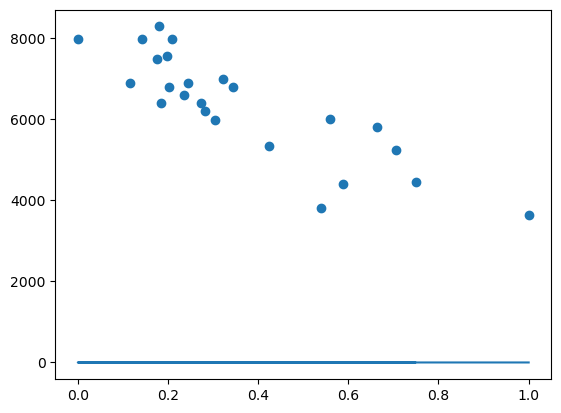

In [6]:
plt.scatter(x, y)
plt.plot(x, X.dot(theta))
plt.show()

In [7]:
cost_function(X, y, theta)

20878424.590010997

## Train the model

In [8]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate 
                               = 0.5, n_iterations = 1000)

In [9]:
theta_final

array([[-4656.59144464],
       [ 8008.43983262]])

In [10]:
cost_function(X, y, theta_final)

222822.6225356367

In [11]:
predictions = model(X, theta_final)

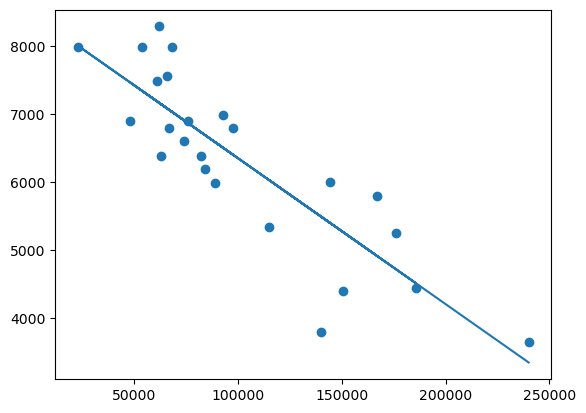

In [12]:
plt.scatter(df['km'], df['price'])
plt.plot(df['km'], predictions)
plt.show()

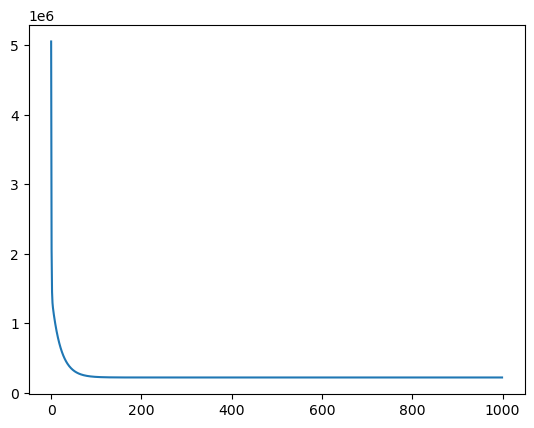

In [13]:
plt.plot(range(1000), cost_history)

In [14]:
coeff_determination(y, predictions)

0.7329747078314965

## Creation of a pickle

In [15]:
output_file = 'trained_model.pkl'
model_results = {
	'theta': theta_final,
    'x_min': x_min,
    'x_range': x_range
}

with open(output_file, 'wb') as f:
    pickle.dump(model_results, f)